This notebook tests if the datassets created by the create_waveform_datasets_HH_BH_on_the_fly_in_bulk.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [1]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
from pnwstore.mseed import WaveformClient

In [2]:
client_waveform = WaveformClient()

## Verify the test datasets for HH/BH

In [4]:
hdf5_test_path = '/fd1/hbito_data/cascadia_obs_ensemble/waveforms_HH_BH_on_the_fly_bulk2.h5'
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    top_keys = list(f.keys())[0]
    print(top_keys)
    print(f[top_keys].keys())
    
    num_waveforms = 0
    waveforms_group = f[top_keys]

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")
                num_waveforms += waveform.shape[0]

    print(f"Total number of waveforms: {num_waveforms}")

Keys in HDF5 file:
 - data
data
<KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(35273, 3, 30000), min=-22310340.00, max=35070916.00
 - 1: shape=(35622, 3, 30000), min=-54476228.00, max=55457156.00
 - 10: shape=(35499, 3, 30000), min=-18591682.00, max=12815489.00
 - 2: shape=(35038, 3, 30000), min=-14780409.00, max=37185640.00
 - 3: shape=(35043, 3, 30000), min=-42788340.00, max=23144372.00
 - 4: shape=(35260, 3, 30000), min=-14021269.00, max=35179196.00
 - 5: shape=(35487, 3, 30000), min=-21810078.00, max=35195176.00
 - 6: shape=(35279, 3, 30000), min=-15142630.00, max=35055732.00
 - 7: shape=(35248, 3, 30000), min=-53956204.00, max=54718308.00
 - 8: shape=(35900, 3, 30000), min=-12061374.00, max=35060192.00
 - 9: shape=(35350, 3, 30000), min=-11306144.00, max=35066384.00
Total number of waveforms: 388999


Keys in HDF5 file:
 - data
data
<KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
Sample key: 7
(35248, 3, 30000)
Sample waveform index: [1660, 22232, 34762]
(3, 3, 30000)


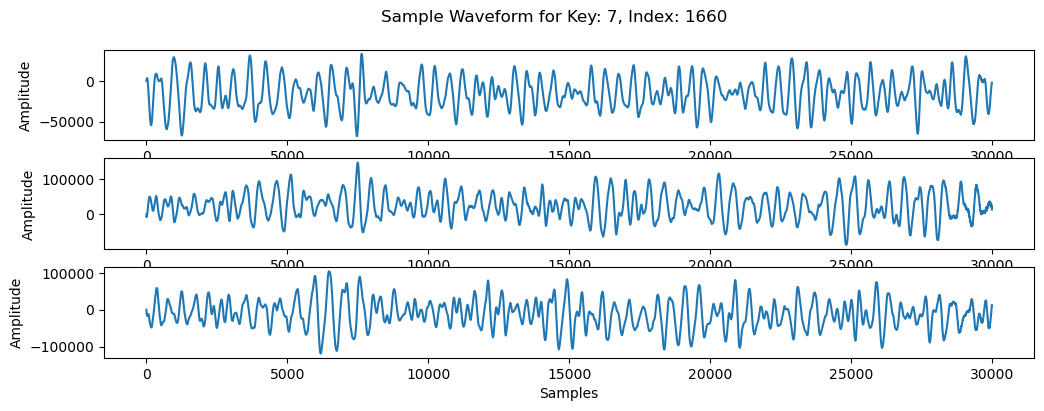

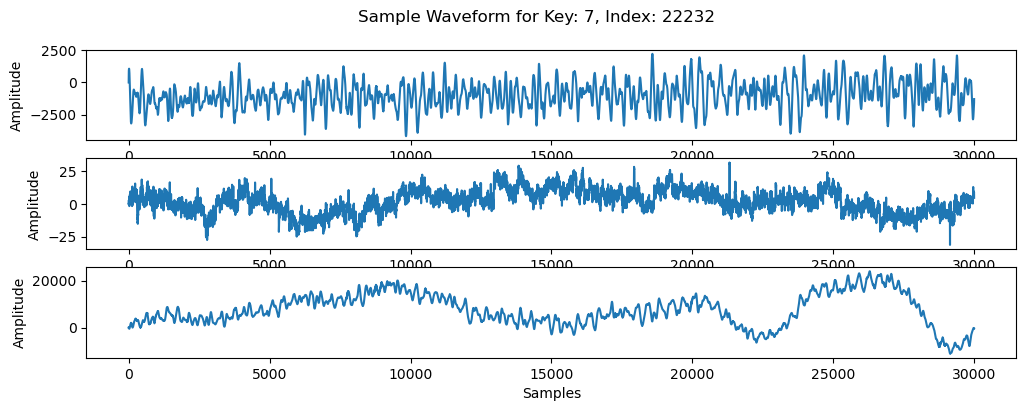

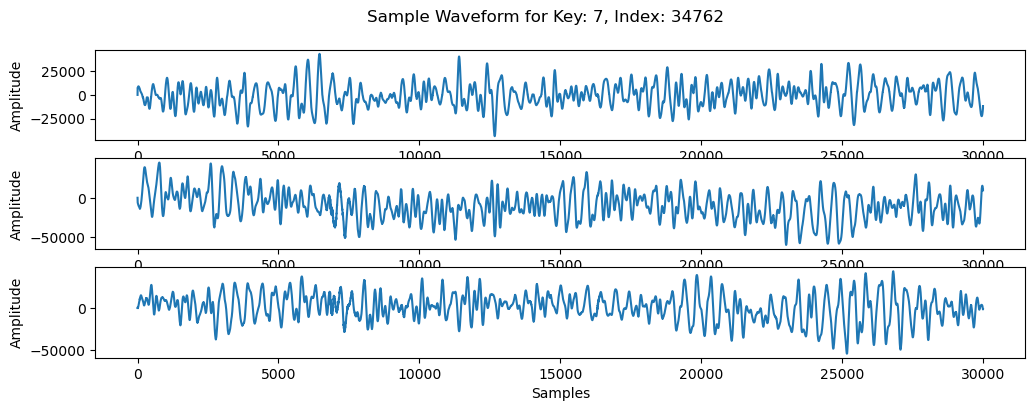

In [25]:
hdf5_test_path = '/fd1/hbito_data/cascadia_obs_ensemble/waveforms_HH_BH_on_the_fly_bulk2.h5'
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    top_keys = list(f.keys())[0]
    print(top_keys)
    print(f[top_keys].keys())
    

    waveforms_group = f[top_keys]

    # for i, key in enumerate(list(waveforms_group.keys())[:]):
    #             waveform = waveforms_group[key][:]
    #             print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = str(np.random.randint(11,size=1).item())
        print(f"Sample key: {sample_key}")
        print(waveforms_group[sample_key].shape)
        idx_sample_waveform = sorted(np.random.randint(waveforms_group[sample_key].shape[0],size=3))
        print(f"Sample waveform index: {idx_sample_waveform}")
        sample_waveform = waveforms_group[sample_key][idx_sample_waveform]
        print(sample_waveform.shape)

        for i in range(sample_waveform.shape[0]):
            fig, ax = plt.subplots(3, 1, figsize=(12, 4))
            y = sample_waveform[i]
            x = np.arange(y.shape[-1])
            for j in range(y.shape[0]):
                ax[j].plot(x, y[j])
                ax[j].set_ylabel("Amplitude")

            ax[-1].set_xlabel("Samples")
            fig.suptitle(f"Sample Waveform for Key: {sample_key}, Index: {idx_sample_waveform[i]}")
        
            plt.show()
        

    

## Verify the metadata for HH and BH

In [32]:
metadata = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/metadata_HH_BH_on_the_fly_bulk2.csv')
print(len(metadata))
metadata.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

388947


,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,1.262305e+09,47.22533,-122.16895,56.111,UW,BH,GNW,NaN,NaN,NaN,NaN,"1$0,:3,:30000","1$0,:3,:30000",100,2010-01-01T00:14:27.262282Z,7473.0,NaN,impulsive,NaN
1,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,UW,BH,PASS,NaN,NaN,NaN,NaN,"10$0,:3,:30000","10$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,7688.0,6535.0,impulsive,impulsive
2,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,CN,BH,HNB,NaN,NaN,NaN,NaN,"7$0,:3,:30000","7$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,8764.0,7134.0,impulsive,impulsive
3,ev1262305009_37536,1.262305e+09,48.19518,-121.77276,3.820,UW,BH,GNW,NaN,NaN,NaN,NaN,"9$0,:3,:30000","9$0,:3,:30000",100,2010-01-01T00:15:59.375360Z,8069.0,NaN,impulsive,NaN
4,ev1262330283_689209,1.262330e+09,47.86208,-122.09903,17.799,UW,BH,GNW,NaN,NaN,NaN,NaN,"8$0,:3,:30000","8$0,:3,:30000",100,2010-01-01T07:17:13.689209Z,6896.0,NaN,impulsive,NaN
5,ev1262330283_689209,1.262330e+09,47.86208,-122.09903,17.799,CN,BH,HNB,NaN,NaN,NaN,NaN,"0$0,:3,:30000","0$0,:3,:30000",100,2010-01-01T07:17:13.689209Z,9294.0,NaN,impulsive,NaN
6,ev1262335916_371091,1.262336e+09,47.96435,-122.91906,21.286,CN,BH,HNB,NaN,NaN,NaN,NaN,"4$0,:3,:30000","4$0,:3,:30000",100,2010-01-01T08:51:06.371091Z,8908.0,NaN,impulsive,NaN
7,ev1262362363_83866,1.262362e+09,45.87262,-122.19180,9.822,UW,BH,YACT,NaN,NaN,NaN,NaN,"8$1,:3,:30000","8$1,:3,:30000",100,2010-01-01T16:11:53.838660Z,5602.0,5358.0,impulsive,impulsive
8,ev1262362363_83866,1.262362e+09,45.87262,-122.19180,9.822,UW,BH,GNW,NaN,NaN,NaN,NaN,"4$1,:3,:30000","4$1,:3,:30000",100,2010-01-01T16:11:53.838660Z,10286.0,NaN,impulsive,NaN
9,ev1262369813_218856,1.262370e+09,48.47626,-123.05830,22.641,UW,BH,PASS,NaN,NaN,NaN,NaN,"6$0,:3,:30000","6$0,:3,:30000",100,2010-01-01T18:16:03.218856Z,7521.0,6423.0,impulsive,impulsive


## Check the error log file making the dataset for HH and BH

In [ ]:
errors = pd.read_csv("/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/save_errors_on_the_fly_bulk2.csv")
print(len(errors))
errors

52


,i_iter,network,station,starttime,endtime,stage,error
0,36044,CN,VGZ,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
1,36045,CN,SNB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
2,36046,CN,PFB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
3,36047,CN,LZB,2012-04-24T23:59:08.908738Z,2012-04-25T00:04:08.908738Z,metadata_write,list index out of range
4,53481,TA,L02D,2012-08-19T02:42:41.651371Z,2012-08-19T02:47:41.651371Z,metadata_write,list index out of range
5,53494,TA,L02D,2012-08-19T05:46:21.222168Z,2012-08-19T05:51:21.222168Z,metadata_write,list index out of range
6,53547,TA,L02D,2012-08-19T08:06:46.821690Z,2012-08-19T08:11:46.821690Z,metadata_write,list index out of range
7,71604,TA,L02E,2012-10-11T02:26:26.015123Z,2012-10-11T02:31:26.015123Z,metadata_write,list index out of range
8,71677,TA,L02E,2012-10-11T06:48:48.648782Z,2012-10-11T06:53:48.648782Z,metadata_write,list index out of range
9,71734,TA,L02E,2012-10-11T06:54:24.664528Z,2012-10-11T06:59:24.664528Z,metadata_write,list index out of range
